#  DnD Enemy study - what's the best aoe cantrip? 
#    ──────────────────────────────

As any character builder enjoyer I have stumbled onto what is - without any possible doubt (cough...)- the best build ever in the history of dnd. Specifically an aoe cantrip build. The main concept being throwing aoe cantrips (magic attacks you can do in one turn of combat) on the enemies. Now three options lay in front of us in form of cantrips:

- __Sword burst__: DEX save, FORCE damage *(momentary circle of spectral blades that sweep around you)*
- __Thunderclap__: CON save, THUNDER damage *(burst of thunderous sound )*
- __Word of Radiance__: CON save, RADIANT damage *(uttering a divine word, a burning radiance erupts from you)*

In my build every cantrip is possible. The goal of this build is to make the most potent aoe damage dealer. Knowing we can choose anyone we must then first answer the question: **what's the best aoe cantrip**. 
All dealing the same damage (1d6) the only difference between them is the save and damage type. Thus, the main variability in their damage dealing capabilities will depend on the victims. An inquiry on these future victims is then required.
---

<div class="alert alert-block alert-info">
<b><font size="2">PS for non DnD player:</font></b>

<font size="1">DnD is a roleplaying game with a set of rules for combat. In these rules every player character and enemy has STATS or Ability Scores, a numerical indicator of their attributes ( strength, dexterity, constitution, intelligence, wisdom, charisma).</font>

<font size="1">Our cantrips are "save-based", which means the target of the cantrip has to throw a dice (of 20 faces, or d20) in order to evade the attack or take damage. 
The dice value must be superior to a specified value DC (for Difficulty Class), for example 13 for level 1 characters.
To evade a cantrip of DC 13 damage the target must throw a d20 dice and get 14 or more.</font>

<font size="1">The STATS will add flat bonuses to the dice throw, making it easier to get higher result to pass the DC and thus evade damage.
A monster with 12 in Dexterity will have a modifier of +1 to DEX, so they will have a +1 added to their d20 roll to defend against the *Sword Burst* cantrip. If they get a roll of 13, they will add a +1, making it a 14, passing a saving throw of DC 13.</font>
</div>



## Table of content: <a class="anchor" id="Content-table"></a>
* [Monster save study](#Monster-study)
    1. [Database](#Database)
        * [1.1 Database used](#Database-used)
        * [1.2 Error handling](#Error-handling)
        
    2. [Observational study](#Observational-study)
        * [2.1 Resistances](#Resistances)
        * [2.2 Correlations between stats](#corr)
        * [2.3 Mean dex and con by cr](#mean-by-cr)
        
    3. [Predictions](#Prediction)
        * [3.1 Verification & application of prior conclusions](#Verification)
        * [3.2 Decision Tree Classifier Prediction](#dtc) 
        * [3.3 Protocol map for dex and con saves](#protocol-map)
    4. [Conclusion](#conclusion)


---
---
# <h3 align="center"><font size="7">Monster save study</font> <a class="anchor" id="Monster-study"></a> [<font size="1">▲</font>](#Content-table)</h3>

***
---

In [1]:
#imports and default settings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.category import UnitData

import requests
from bs4 import BeautifulSoup

In [3]:
sns.set_style("darkgrid")

## __1. Database__ <a id="Database"></a> [<font size="1">▲</font>](#Content-table)



### 1.1 Database used <a class="anchor" id="Database-used"></a> [<font size="1">▲</font>](#Content-table)

So, what's the stuff we have to kill like?

First lets import a database of evil stuff. Luckily for us some people over Kaggle have already scraped a simple list at:

https://www.kaggle.com/datasets/travistyler/dnd-5e-monster-manual-stats?resource=download&select=cleaned_monsters_basic.csv

In [4]:
f = "https://www.kaggle.com/datasets/travistyler/dnd-5e-monster-manual-stats?resource=download&select=cleaned_monsters_basic.csv"

In [5]:
#This database has so many columns we don't need... lets rename them and take only what we need

columns = ['0', 'name', 'size', 'monster_type', 'alignment', 'ac', 'hp',
       'str', 'str_mod', 'dex', 'dex_mod', 'con', 'con_mod', 'int',
       'int_mod', 'wis', 'wis_mod', 'cha', 'cha_mod', 'senses', 'languages',
       'cr', 'str_save', 'dex_save', 'con_save', 'int_save', 'wis_save',
       'cha_save', 'speed', 'swim', 'fly', 'climb', 'burrow',
       'number_legendary_actions', 'history', 'perception', 'stealth',
       'persuasion', 'insight', 'deception', 'arcana', 'religion',
       'acrobatics', 'athletics', 'intimidation']

useful_columns  = ['name', 'cr', 'ac', 'hp', 
                  'str', 'str_mod', 'dex', 'dex_mod', 'con', 'con_mod', 
                  'int','int_mod', 'wis', 'wis_mod', 'cha', 'cha_mod', 
                  'str_save', 'dex_save', 'con_save', 'int_save', 'wis_save', 'cha_save', 
                   'speed', 'size', 'monster_type', 'swim', 'fly', 'climb' ]

df = pd.read_csv(
                "cleaned_monsters_basic.csv", 
                header = 0, 
                names = columns,
                usecols = useful_columns 
                )
        
df = df.reset_index(drop = True)
df["numeric_cr"] = df.cr.apply(eval)
#We will explicitly write the cr levels in order for future use
str_cr_order = ['0', '1/8', '1/4', '1/2', '1', '2', '3', '4', '5', '6',
                '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                '17', '19', '20', '21', '22', '23', '24', '30']
df.head(5)

,name,size,monster_type,ac,hp,str,str_mod,dex,dex_mod,con,...,dex_save,con_save,int_save,wis_save,cha_save,speed,swim,fly,climb,numeric_cr
0,Aboleth,Large,Aberration,17,135,21,5,9,-1,15,...,0,6,8,6,0,10,40,0,0,10.00
1,Acolyte,Medium,Humanoid (any race),10,9,10,0,10,0,10,...,0,0,0,0,0,30,0,0,0,0.25
2,Adult Black Dragon,Huge,Dragon,19,195,23,6,14,2,21,...,7,10,0,6,8,40,40,80,0,14.00
3,Adult Blue Dragon,Huge,Dragon,19,225,25,7,10,0,23,...,5,11,0,7,9,40,0,80,0,16.00
4,Adult Brass Dragon,Huge,Dragon,18,172,23,6,10,0,21,...,5,10,0,6,8,40,0,80,0,13.00


---

### 1.2 Error handling <a class="anchor" id="Error-handling"></a> [<font size="1">▲</font>](#Content-table)

Although we found it in kaggle, nothing ever is perfect: through our study we have found an error on this database. We will try to clean it up.

In [6]:
df[df["name"] == "Tarrasque"]\
      [['name', 'dex', 'dex_mod', 'dex_save', 'con', 'con_mod', 'con_save']]\
      .style\
      .apply(lambda x: ['background-color: #B2B2B2' if x.values == 30 and x.name == "con" else ''], axis=0)\
      .apply(lambda x: ['background-color: #D1D1D1' if x.values == 1 and x.name == "con_mod" else ''], axis=0)
            

,name,dex,dex_mod,dex_save,con,con_mod,con_save
280,Tarrasque,11,0,0,30,1,0


This monster has a con stat of 30, but a mod of 1. Every stat value has a specified modifier, and 30's one is a +10

_(PS: in this table con is the stat, con_mod is the modificator, and con_save is the save when defined by other rules. If this last one is bigger it is used instead of con_mod)_

Lets quickly create a dictionary with the appropriated values

In [7]:
import math

stats_mods = dict(zip (range(1,31), [-5 + math.floor(x/2) for x in range(1,31)]))

stats_mod keys and values:

| **Stat** |1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**Mod**|-5|-4|-4|-3|-3|-2|-2|-1|-1|0|0|+1|+1|+2|+2|+3|+3|+4|+4|+5|+5|+6|+6|+7|+7|+8|+8|+9|+9|+10|

Lets look for more errors where the stat mod isn't the right one

In [8]:
for stat in ['str','dex','con','int','wis','cha']:
    stat_mod = stat + "_mod"
    errors = df[ df[stat_mod] != df[stat].apply(lambda x : stats_mods[x]) ].shape[0]
    
    if errors >0:
        print(errors," errors in stat", stat)

5  errors in stat str
1  errors in stat con
1  errors in stat cha


7 stats mods aren't the good ones. If we would look into the errors we would indeed see there's something going on with stats with a score of 30. Let me skip the search and directly put out the monsters that have an error:


In [9]:
cols_to_see = ["name", 'str', 'str_mod', 'dex','dex_mod', 
               'con', 'con_mod', 'int', 'int_mod', 
               'wis', 'wis_mod', 'cha', 'cha_mod']

df[df[['str', 'dex', 'con','int', 'wis', 'cha']].eq(30).any(axis=1)][cols_to_see]\
    .style.apply(lambda x: ['background-color: #B2B2B2' if values == 30 else '' for values in x], axis=0)\
    .apply(lambda x: ['background-color: #d1d1d1' if values == 1 else '' for values in x], axis=0)

,name,str,str_mod,dex,dex_mod,con,con_mod,int,int_mod,wis,wis_mod,cha,cha_mod
18,Ancient Gold Dragon,30,1,14,2,29,9,18,4,17,3,28,9
20,Ancient Red Dragon,30,1,10,0,29,9,18,4,15,2,23,6
21,Ancient Silver Dragon,30,1,10,0,29,9,18,4,15,2,23,6
181,Kraken,30,1,11,0,25,7,22,6,18,4,20,5
257,Solar,26,8,22,6,26,8,25,7,25,7,30,1
280,Tarrasque,30,1,11,0,30,1,3,-4,11,0,11,0


It seems like stats with a score of 30 aren't properly passed to a +10 on the stat mod.<br>
Lets change the errors

In [10]:
for stat in ['str','dex','con','int','wis','cha']:
    stat_mod = stat + "_mod"
    df[stat_mod] = df[stat].apply(lambda x : stats_mods[x])

In [11]:
df[df[['str', 'dex', 'con','int', 'wis', 'cha']].eq(30).any(axis=1)][cols_to_see]\
    .style.apply(lambda x: ['background-color: #B2B2B2' if values == 30 else '' for values in x], axis=0)\
    .apply(lambda x: ['background-color: #D1D1D1' if values == 10 and "mod" in x.name else '' for values in x], axis=0)

,name,str,str_mod,dex,dex_mod,con,con_mod,int,int_mod,wis,wis_mod,cha,cha_mod
18,Ancient Gold Dragon,30,10,14,2,29,9,18,4,17,3,28,9
20,Ancient Red Dragon,30,10,10,0,29,9,18,4,15,2,23,6
21,Ancient Silver Dragon,30,10,10,0,29,9,18,4,15,2,23,6
181,Kraken,30,10,11,0,25,7,22,6,18,4,20,5
257,Solar,26,8,22,6,26,8,25,7,25,7,30,10
280,Tarrasque,30,10,11,0,30,10,3,-4,11,0,11,0


fixed!

---

## Observational study <a class="anchor" id="Observational-study"></a> [<font size="1">▲</font>](#Content-table)

### 2.1 Resistances <a class="anchor" id="Resistances"></a> [<font size="1">▲</font>](#Content-table)

We are missing the resistances, lets fetch them quickly.
We know the kaggle data we are using comes from the scrapping of the roll20 webpage. We're directly using this kaggle csv for convenience. It seems however they missed/ignored some of the data from the webpage. We will scrap them to complete our database.

In [12]:
df["FORCE_res"] = 0
df["THUNDER_res"] = 0
df["RADIANT_res"] = 0
df["FORCE_immun"] = 0
df["THUNDER_immun"] = 0
df["RADIANT_immun"] = 0

In [13]:
import requests
from bs4 import BeautifulSoup

url = "https://roll20.net/compendium/dnd5e/"

In [14]:
url_dic = {}
down = False
if down:
    for monster in df.name:
        url_ = url + monster

        # Make a request to url
        page = requests.get(url_)
        soup = BeautifulSoup(page.content, 'html.parser')

        cl = "row attrListItem"
        attrib_found = soup.find_all("div", {"class": cl})

        url_dic[monster] = attrib_found

In [15]:
import pickle 
import sys
sys.setrecursionlimit(10000)

In [16]:
need_to_write = False
if need_to_write:
    with open('saved_dictionary.pkl', 'wb') as f:
        pickle.dump(url_dic, f)


In [17]:
        
with open('saved_dictionary.pkl', 'rb') as f:
    attr_dic = pickle.load(f)

In [18]:
res_link = { "force" : "FORCE_res",
           "thunder" : "THUNDER_res",
           "radiant" : "RADIANT_res"}
imm_link = { "force" : "FORCE_immun",
           "thunder" : "THUNDER_immun",
           "radiant" : "RADIANT_immun"}

for monster in df.name:
    
    attrib_found = attr_dic[monster]

    for element in attrib_found:
        #fetching the immunities
        if element.find("div", {"class": "col-md-3 attrName"}).text.lower() == "immunities":
            im = element.find("div", {"class": "value"}).text
            immunities_str = im.lower()
            
            for imm in imm_link.keys():
                if imm in immunities_str:
                    df.loc[(df['name'] == monster), imm_link[imm]] = 1 
                    
        #fetching the resistances
        if element.find("div", {"class": "col-md-3 attrName"}).text.lower() == "resistances":
            re = element.find("div", {"class": "value"}).text
            resistances_str = re.lower()
            
            for res in res_link.keys():
                if res in resistances_str:
                    df.loc[(df['name'] == monster), res_link[res]] = 1 
            
    


In [19]:
cols_to_see = ["name", "cr",
              'FORCE_res', 'FORCE_immun', 'RADIANT_res', 
               'RADIANT_immun', 'THUNDER_res', 'THUNDER_immun']

df[(df['FORCE_res'] == 1) |\
   (df['THUNDER_res'] == 1) |\
   (df['RADIANT_res'] == 1) |\
   (df['FORCE_immun'] == 1) |\
   (df['THUNDER_immun'] == 1) |\
   (df['RADIANT_immun'] == 1)][cols_to_see]\
    .style.apply(lambda series: ['background-color: #F8CECA' if value == 1 else '' for value in series], axis=0)

,name,cr,FORCE_res,FORCE_immun,RADIANT_res,RADIANT_immun,THUNDER_res,THUNDER_immun
12,Air Elemental,5,0,0,0,0,1,0
70,Couatl,4,0,0,1,0,0,0
79,Deva,10,0,0,1,0,0,0
82,Djinni,11,0,0,0,0,0,1
111,Ghost,4,0,0,0,0,1,0
221,Planetar,16,0,0,1,0,0,0
251,Shadow,1/2,0,0,0,0,1,0
257,Solar,21,0,0,1,0,0,0
258,Specter,1,0,0,0,0,1,0
267,Storm Giant,13,0,0,0,0,0,1


In [20]:
print("- Total number of resistance and immunities -")

for element in ["Force", "Thunder", "Radiant"]:
    cols = [element.upper() + suffix for suffix in ["_res", "_immun"]]
    print(f"{element}: {df[df[cols].eq(1).any(axis=1)].shape[0]}")

- Total number of resistance and immunities -
Force: 0
Thunder: 8
Radiant: 4


Well, apparently thunder offers the worst coverage, while force is resisted by no one.
Sadly, we can already rule out the first eliminated of the contest: **Thunderclap**.

Sharing the save stat with Word of radiance, it has more resistance against it, making it objectively worse. That said, it can still be usefull as an alternative against monster with radiant damage resistance if we are using con save cantrips.

<div class="alert alert-block alert-warning">
<b>Pro tip:</b> Users usually rule out Thunderclap because of the noise it makes ( "[...] thunderous sound that  can be heard up to 100 feet away"). This oftens gives the dm the opportunity to make far away monsters aware of the fight, something uncommonly appreciated by players in strenuous situations.
</div>


---

### 2.2 Correlation between stats <a class="anchor" id="corr"></a> [<font size="1">▲</font>](#Content-table)

Now, there's a logical assumption that when a GM puts creatures on the field map, they have a tendency to be "lighter" creatures if they are numerous ("light" being higly dependant on GM interpretation) compared to when they put fewer or a single creature, where they tend to be bigger, or more resistant. This could mean if they are numerous, they could be more dexterous, making it worse for dex save cantrips, and better for con saves.

There's also the rule for the **Challenge Rating** (cr), i.e. the monster level. If several creatures are in the field they should have the same summed up level of difficulty than a single creature if they were to fight the players.

This idea is logical mathematically. If one creature has to endure all the damage from the players they need to be resistant. If the threat is divided among several creatures, the need for them to have higher resistance isn't important, it could even make the combat too hard. It could mean that when more creatures are present their resistance should be lower, so lower con stats.

This could indicate that when a GM decides to put several smaller creatures (making a perfect situation for the use of our aoe cantrip) the monsters could have different stats than when individual biggers ones are summoned

Thus, lets start by study the influence of size and challenge rating in the stats and also the stats correlation to each other.

<div class="alert alert-block alert-info">
<b>Pro tip:</b> Challenge rating (cr) is a way to calculate the difficulty of a monster. 
A party of 4 player of level $ x $ should be able to beat one creature of cr $ x $, or 2 creatures of cr $ x/2 $, or 4 creatures of cr $ x/4 $ and etc.
<font size="1">(This is an over simplification but the base concept is the same)</font>
</div>

In [21]:
#Lets change size which is a categorical ordinal variable into a quantitative discrete variable for simplicity's sake
numeric_size = {'Large': 4, 'Medium' : 3, 'Huge': 5, 
    'Gargantuan': 6, 'Small' : 2, 'Tiny' : 1
    }

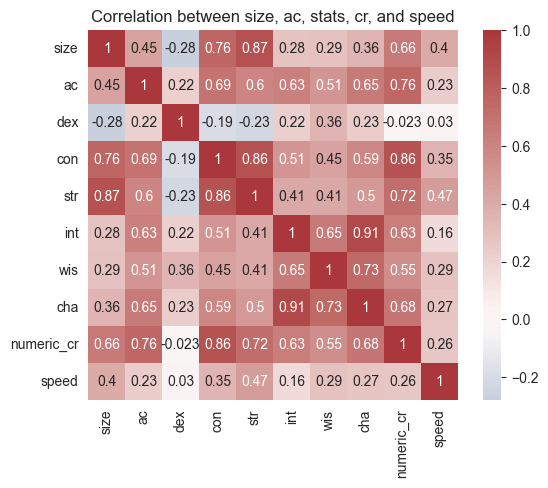

In [22]:
columns = ['size', 'ac', 'dex', 'con','str', 'int',
           'wis','cha', 'numeric_cr', 'speed'
          ]
dfc = df[columns].copy(deep=True)
dfc["size"] = dfc["size"].apply(lambda size : numeric_size[size])
corrmatt = dfc.corr()
hm = sns.heatmap(corrmatt, 
                 cbar=True, 
                 annot=True, 
                 center = 0, 
                 square = True, 
                 cmap="vlag")
plt.title("Correlation between size, ac, stats, cr, and speed")
plt.show()

__Interesting relations__:
 - dex is negatively correlated to size, con and str: the bigger, the stronger, the sturdier the monster, the less dexterous. There's definitelly a difference between big sturdy monster and agile ones
 - following this, con is negatively correlated by dex: if con raises, dex doesn't
 - dex seems almost untouched by cr: the harder the monster, not necesarily the dexterous
 - con seems heavily influenced by cr: a harder monster definitely means more constitution and more life
 - surprisingly speed hasn't got a big correlation with dex, con is more correlated to it, although it could be because of the size of the creature

Now, size definitely seems a factor in a monster's dex and con attributes. If a monster is bigger, it tends to be less dexterous, and it gets stronger and more resistant. 

Cr though seems less of a factor for higher dex stats.

One hypothesis about independance of dex from cr could be that the dex stat is quite relevant in many abilities like evading attacks (magical or influencing ac), attacking first (initiative), or making attacks. It's prevalence and utility could make things too hard if it would augment in relation to monster difficulty aka cr.
In any case, the higher the level - and thus the challenge rating- the higher the con stat. This could be a lead.


In [23]:
df_val_counts = pd.DataFrame(df.value_counts(["cr", "dex"])).reset_index()
df_val_counts.columns = ['cr', 'dex', 'count']

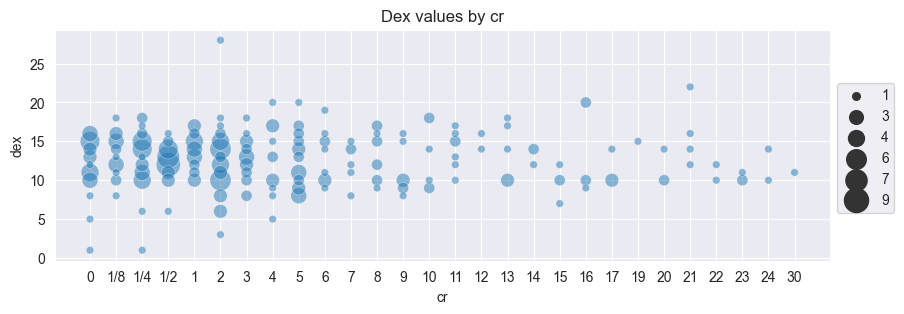

In [24]:
plt.figure(figsize =(10, 3))
sns.scatterplot(df_val_counts, x = "cr", y = "dex", size = "count", xunits=UnitData(str_cr_order), legend="brief", alpha = 0.5, sizes = (30,300))
plt.title("Dex values by cr");plt.legend(bbox_to_anchor=(1, 0.8));plt.show()

But, as we are interested in dex/con saves, are we really onto something right now?

There's an important thing we already commented: stats saves are not necesarily dependant on stats modifiers -> **some monsters have alternative save attributes**

In [25]:
df[df.dex_save != df.dex_mod][["name", 'dex', 'dex_mod', "dex_save" ]].head(3)

,name,dex,dex_mod,dex_save
0,Aboleth,9,-1,0
2,Adult Black Dragon,14,2,7
3,Adult Blue Dragon,10,0,5


Thus this correlation heatmap, while it can help us with knowing what type of creature to deal with, is not gona help us with con/dex saves.

Lets study then the correlation using what we will call the final saves (bigger number between stats mod and alternative save mod).

In [26]:
def find_save(arg1, arg2):
    #if the save is null (arg2) it means the monster has no alternative save, thus falling onto stat mod derived save
    if arg2 == 0:
        return arg1
    else: 
        return arg2

for stat in ['str', 'dex', 'con','int', 'wis', 'cha']:
    df[stat+"_save_f"] = df.apply(lambda x: find_save(x[stat+"_mod"], x[stat+"_save"]), axis=1)

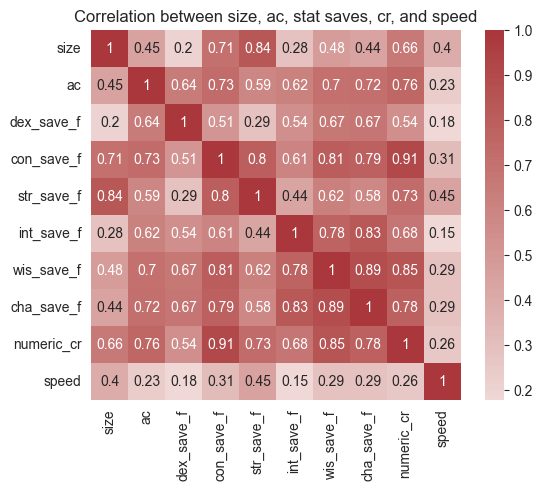

In [27]:
columns = ['size', 'ac', 
           'dex_save_f', 'con_save_f', 'str_save_f', 'int_save_f', 'wis_save_f','cha_save_f',
           'numeric_cr', 'speed'
          ]
dfcf = df[columns].copy(deep=True)
dfcf["size"] = dfcf["size"].apply(lambda size : numeric_size[size])
corrmat = dfcf.corr()
hm = sns.heatmap(corrmat, cbar=True, annot=True, square = True, robust= True, center = 0, cmap="vlag")

plt.title("Correlation between size, ac, stat saves, cr, and speed")
plt.show()

As we can see the values are less drastic. 

__Interesting relations__:

 - The correlation between size and dex saves, and str saves and dex saves is now positive, although still quite low 
 - Dex saves and con saves are more correlated, possibly indicating higher saves in higher level monsters
 - There's a high relation between higher ac and higher dex saves, not found in simple dex stat, also probably because of higher monster level
 - Dex save is positivelly influenced by cr as we would expect (although less than con save) contrary to dex stat. This also helps the theory that a higher dex might be problematic and instead alternative dex saves are put in place.
 - Con saves are almost identically correlated to cr as the con stat


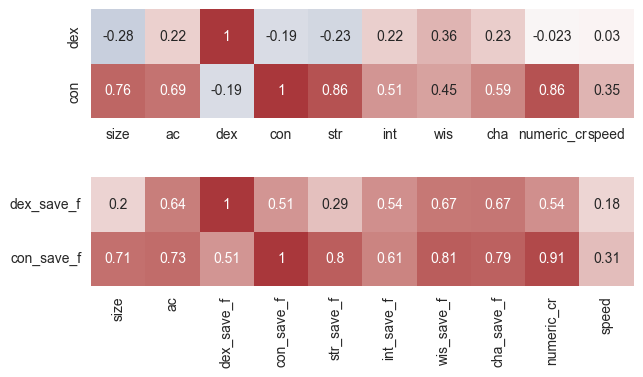

In [28]:
fig = plt.figure(figsize =(7, 4))
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)
sns.heatmap(corrmatt.loc[['dex', 'con']], cbar=False, annot=True, center = 0, square = True, cmap="vlag", ax= ax1)
sns.heatmap(corrmat.loc[['dex_save_f', 'con_save_f']], cbar=False, annot=True, square = True, robust= True, center = 0, cmap="vlag", ax= ax2)
plt.show()

So, saves have a higher positive correlation over all between them. The obvious hypothesis is that when a monster has a higher difficulty rating -cr-, it needs to have higher defenses for harder hitting heroes. Because stats can affect a variety of things, rising stat saves is an effective method of making them more resistent without completely making them invincible. This gives a natural augmentation depending on monster cr that affects every stat save, making them more correlated.


The question is: How much does higher cr monster affect the correlations?

Lets quickly plot the distribution of stats modifiers and stat final saves (taking into account alternative saves) of monsters

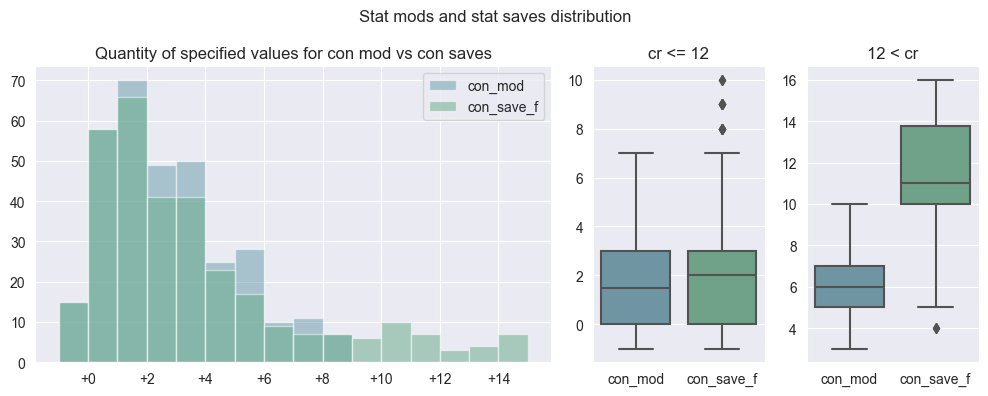

In [29]:
cr_n = 12
c_m = '#69A' #mod color
c_s = "#6A8" #save_f color
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), width_ratios=[3, 1, 1]) #, sharey=True

df["con_mod"].hist( bins = [x for x in range(df["con_mod"].min(),df["con_mod"].max())],
                      legend = True, color = c_m, alpha = 0.5, ax = axes[0])

df["con_save_f"].hist( bins = [x for x in range(df["con_save_f"].min(),df["con_save_f"].max())],
                      legend = True, color = c_s, alpha = 0.5, ax = axes[0])

sns.boxplot(data=df[['con_mod', 'con_save_f']][df.numeric_cr> cr_n], 
            palette = [c_m,c_s], ax = axes[2])
sns.boxplot(data=df[['con_mod', 'con_save_f']][df.numeric_cr<= cr_n], 
            palette = [c_m,c_s], ax = axes[1])


axes[0].set_title(f"Quantity of specified values for con mod vs con saves")
axes[0].set_xticks(range(0,15, 2)); axes[0].set_xticklabels(["+"+str(x) for x in range(0,15, 2)])
axes[2].set_title(f"{cr_n} < cr")
axes[1].set_title(f"cr <= {cr_n}")

plt.suptitle("Stat mods and stat saves distribution")
plt.tight_layout()
plt.show()

Clearly the correlations are very influenced by the challenge ratings. Stat saves get way higher and different than stat mods depending on cr.<br>
This means correlations might be skewed by the strong relation with the challenge rating depending on the cr bracket.

So:

We have seen smaller creature gets higher dex, but not by that much. The dex stats is quite static all along the monsters.  *But*, dex saves **do** scale very slightly with size and strength. So, the smaller the creature, it might actually get lower dex saves (although not by that much again). What is sure is if it's smaller it definitely get smaller con saves.


We have also seen that the dex stat doesn't get higher when the challenge rating augments, so a bunch of creatures can be as dexterous as a single big bad boy on the field. But the dex save slightly augments as cr augments too, so that big bad boy might get better saves than the smaller ones, who could be more vulnerable to ouw dex cantrip. 


As we explained just above, cr has a big effect on saves. This means we cannot have an overall look into monsters without considering cr. Anyways a group of adventurer won't fight monsters with very different crs, instead they will fight monster in a specified bracket more adjusted to their level. So, a better look could be based on cr.

### 2.3 Mean dex and con by cr<a id="mean-by-cr"></a> [<font size="1">▲</font>](#Content-table)

Lets try to see mean mods and save by cr

We will plot the amount of creatures in each cr level to better see why some numbers are so out of line (see cr 12)

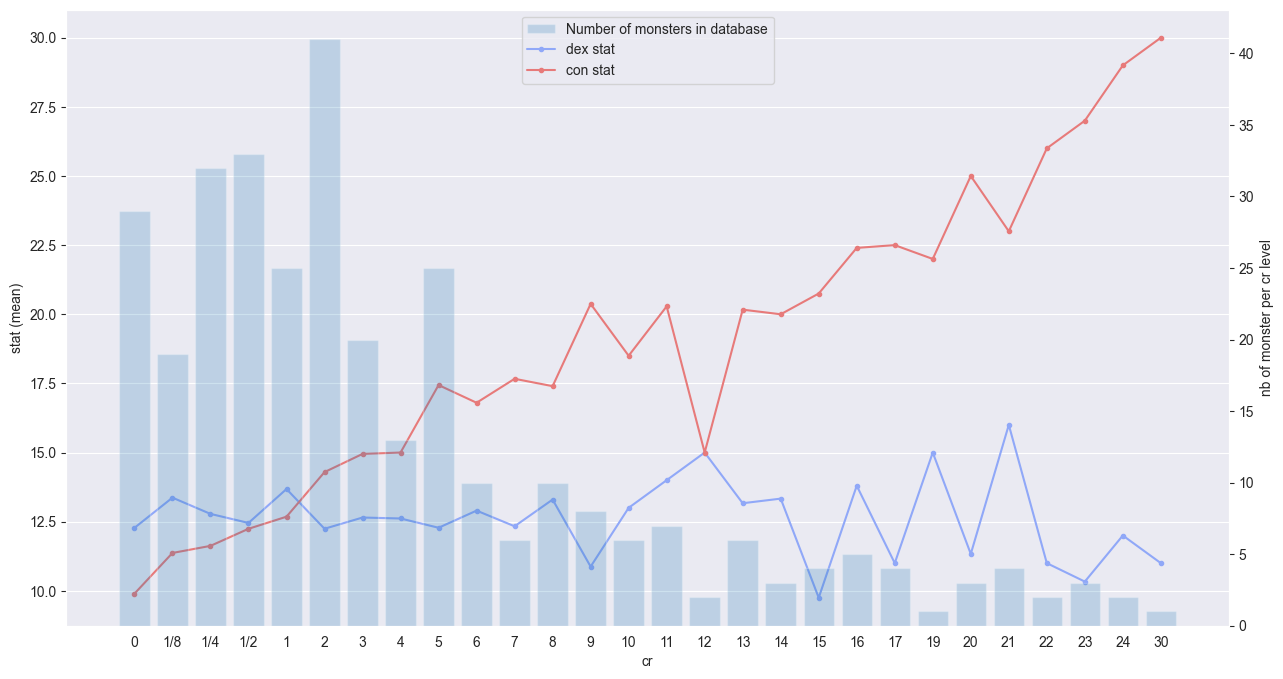

In [30]:
fig, ax1 = plt.subplots(figsize=(15, 8))

#saves lines plotting from twinx copying
ld, = ax1.plot(df.groupby('cr')[['dex']].mean().reindex(labels = str_cr_order),
              color = "#90a8f8", marker = ".", label = "dex stat")
lc, = ax1.plot(df.groupby('cr')[['con']].mean().reindex(labels = str_cr_order),
              color = "#e77a7a", marker = ".", label = "con stat")
ax1.set_ylabel('stat (mean)')
ax1.xaxis.grid(False)
ax1.set_xlabel('cr')

#creating bar plot for count in every cr
ax2 = ax1.twinx()
cr_counts = df["cr"].value_counts()
b = ax2.bar(x = cr_counts.index,
        height = cr_counts.values,
        alpha = 0.22, label = "Number of monsters in database", width=0.8, 
        xunits=UnitData(str_cr_order)
       )
ax2.set_ylabel('nb of monster per cr level')
ax2.grid(False)
plt.legend(handles = [b, ld, lc], loc= "upper center")

plt.show()

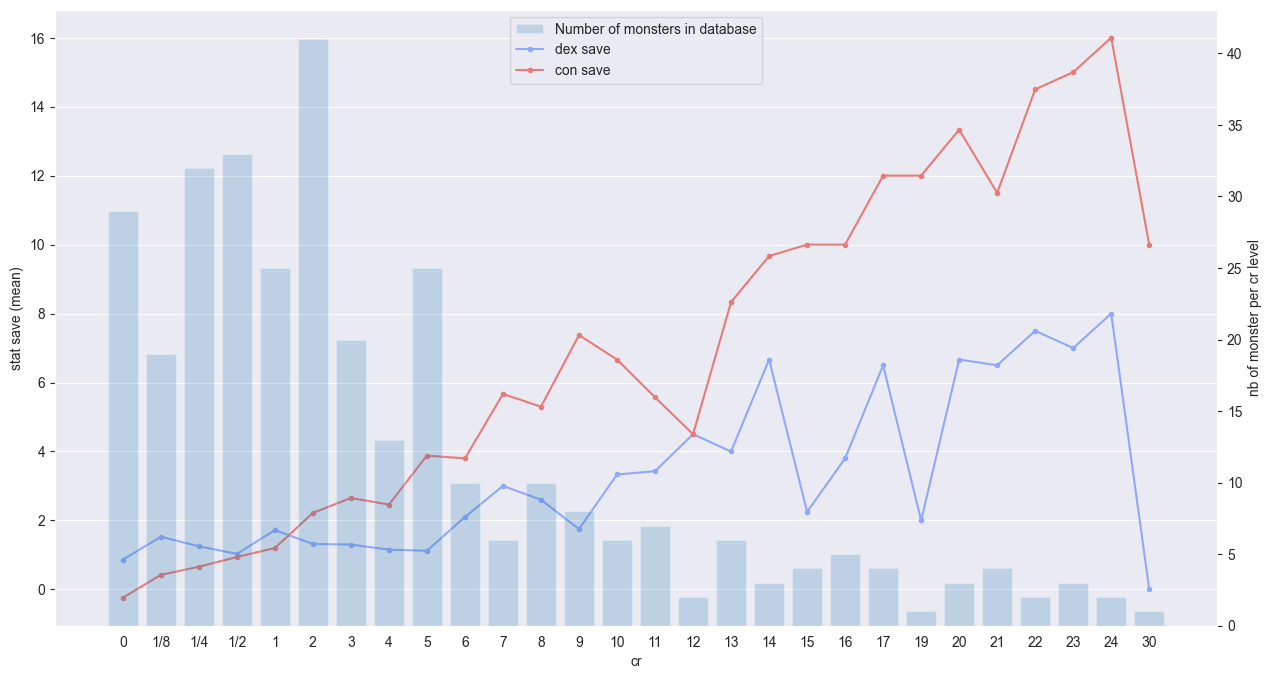

In [31]:
fig, ax1 = plt.subplots(figsize=(15, 8))

#saves lines plotting from twinx copying
ld, = ax1.plot(df.groupby('cr')[['dex_save_f']].mean().reindex(labels = str_cr_order),
              color = "#90a8f8", marker = ".", label = "dex save")
lc, = ax1.plot(df.groupby('cr')[['con_save_f']].mean().reindex(labels = str_cr_order),
              color = "#e77a7a", marker = ".", label = "con save")
ax1.set_ylabel('stat save (mean)')
ax1.xaxis.grid(False)
ax1.set_xlabel('cr')

#creating bar plot for count in every cr
ax2 = ax1.twinx()
cr_counts = df["cr"].value_counts()
b = ax2.bar(x = cr_counts.index,
        height = cr_counts.values,
        alpha = 0.22, label = "Number of monsters in database", width=0.8, 
        xunits=UnitData(str_cr_order)
       )
ax2.set_ylabel('nb of monster per cr level')
ax2.grid(False)
plt.legend(handles = [b, ld, lc], loc= "upper center")

plt.show()

Now this is something

We can clearly see the observations we made before on this.

Dex stat varies over a static bracket

Dex saves do get higher but, as explained before, it's thanks to the augmentation in higher cr brackets. If we take the bracket between 0 and 5 cr it is more or less constant, it even gets lower from 1 to 5.

Con stat and its saves simply gets higher with cr


Well, that is quite conclusive. What we can see is that depending on the cr it might be better to use con over dex stat at lower levels, while it is normally much more preferable to use dex saves at higher levels. Of course the possible deviation from the mean has to make us wary of this simplification, but as a rule of thumb:

When cr is lower than 2: <br>
__Word of Radiance__ (CON save) is the winner!
 
Wehn cr is higher than 2:<br>
__Sword burst__ (DEX save) is the winner!



---

## Predictions <a class="anchor" id="Prediction"></a> [<font size="1">▲</font>](#Content-table)

### 3.1 Verification & application of prior conclusions <a class="anchor" id="Verification"></a> [<font size="1">▲</font>](#Content-table)

Ok so, we have already seen that con saves are better at cr<2, and dex at cr>2, thus we could in theory predict what save to use depending on cr. But, to be critical of our own conclusions: is it really an usefull rule of thumb?

Lets calculate the precision of the rule on each cr level to see how this rule applies. We will calculate the percentage of monsters whose dex & con relation (<, = or >) is the same as the relation between the means.

> i.e. :  monster's dex save > con save, but monster's cr dex save mean < con save mean => rule of thumb fails for monster

In [32]:
dfc = df.copy(deep = True)
def dex_con_finder(dexs, cons):
    if dexs < cons:
        return 0
    elif dexs == cons:
        return 1
    else:
        return 2

dfc["dex_higher_than_con"] = dfc.apply( lambda x: dex_con_finder(x.dex_save_f, x.con_save_f), axis = 1)

In [33]:
dex_mean = df.groupby('cr')[['dex_save_f']].mean()
con_mean = df.groupby('cr')[['con_save_f']].mean()

In [34]:
dfc["mean_dex"] = dfc["cr"].apply(lambda x: dex_mean.loc[x])
dfc["mean_con"] = dfc["cr"].apply(lambda x: con_mean.loc[x])
dfc["mean_dex_h_than_mean_con"] = dfc.apply( lambda x: dex_con_finder(x.mean_dex, x.mean_con), axis = 1)

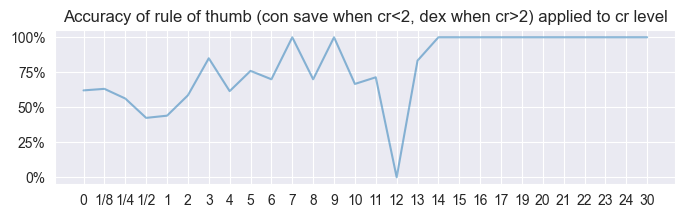

Total accuracy of our rule of thumb on all monsters: 66.4%


In [35]:
accuracy_per_cr = []
for cr_ in str_cr_order:
    acc = dfc.loc[dfc.cr == cr_].loc[dfc.dex_higher_than_con == dfc.mean_dex_h_than_mean_con].shape[0]\
          / dfc.loc[dfc.cr == cr_].shape[0]
    accuracy_per_cr.append(acc)
fig = plt.figure(figsize =(8, 2))
plt.plot(str_cr_order, accuracy_per_cr, alpha = 0.5)
plt.yticks([0,0.25,0.5,0.75,1], labels = ["0%","25%","50%","75%", "100%"])
plt.title("Accuracy of rule of thumb (con save when cr<2, dex when cr>2) applied to cr level")
plt.show()

print(f"Total accuracy of our rule of thumb on all monsters: {round(dfc.loc[dfc.dex_higher_than_con == dfc.mean_dex_h_than_mean_con].shape[0]/ dfc.shape[0],3)*100}%")

Wow, that definitely doesn't seem very precise.

There's 100% accuracy at cr 7, 9 and >13, but the rest is not very good. Less than 50% accuracy for cr 1/2 and 1 is too bad (which was to be expected with the mean of the dex and con saves being so close to each other). Less than 50% means that it's better to do the opposite of our rule of thumb! And yet we would only have around 60% accuracy. Pitiful.<font size="2">( _Might exagerate for dramatic effects_.)</font>

Although it's a useful indication at higher levels, it seems the rule of thumbs is too simplified to be precise in the lower bracket.<br>
<font size="2">(We have to keep in mind that when monster's dex and con saves are the same - and thus we could use any cantrip- our systems counts it as an inaccuracy. Also there are a lot more monsters in lower brackets where accuracy is lower, thus skewing the overall accuracy down, but at higher levels it's still all right. Around cr 4 and onwards the overall accuracy is 80% and augmenting the higher we get, so it's still quite solid as a rule of thumb for higher cr)</font>

Anyways, as a player you don't have acces to the cr of the monsters you're facing, they sadly don't have it written on the forehead. So even if we have a slight indication based on our own level, we couldn't base our election of cantrips enterely on this. Not only it's not precise by itself, but we cannot acces monsters' cr with precision!<br>
What can we do then?<br>

Well, when we are fighting monsters in dnd we are interpreting a character in front of those monsters. This means we can simply observe what kind of monster we have in front. Is it big? is it little? is it fast? is it bulky? Does it fly? is it a tiger or a snake?

Could we maybe do something about that?..

### 3.2 Decision Tree Classifier Prediction <a id="dtc"></a> [<font size="1">▲</font>](#Content-table)

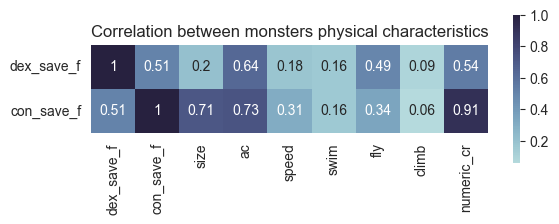

In [36]:
columns_to_analise = ['dex_save_f', 'con_save_f', 
           'size', 'ac', 'speed', 'swim', 'fly', 'climb', 'numeric_cr' ]
dfat = df[columns_to_analise].copy(deep=True)
dfat["size"] = dfat["size"].apply(lambda size : numeric_size[size])
dfat["swim"] = dfat["swim"].apply(lambda x: 1 if x>0 else 0)
dfat["fly"] = dfat["fly"].apply(lambda x: 1 if x>0 else 0)
corrmatat = dfat.corr(numeric_only = True)
hm = sns.heatmap(corrmatat.loc[['dex_save_f', 'con_save_f']].round(2), annot=True, center = 0.5,
                 square = True, cbar_kws={"shrink": 0.4}, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
                )
plt.title("Correlation between monsters physical characteristics")
plt.show()

There are some characteristics on the monsters that might have some influence on the dex saves and con saves. (One that is missing in this plot is the monster type), and we're going to use that to our favor.

The first step is creating a model with the data we have. We have decided to go with a Decission Tree Classifier for reasons later explained. 

We will start by preping the data. For that we need to put the monster types as dummies. <br>
Since we have a slight complexity in the strings defining it, we will manually dummy them.

In [37]:
dfm = df.copy(deep = True)

In [38]:
#correcting known errors
dfm["monster_type"] = dfm["monster_type"].apply( lambda x: 'Fiend (devil)' if x == 'Fiend (devil' else x)
dfm["monster_type"] = dfm["monster_type"].apply( lambda x: 'Humanoid (human)' if x == 'Humanoid (human' else x)

In [39]:
all_m_types = []

for mtype in dfm.monster_type.unique():
    if "(" in mtype:
        splited = mtype.split("(")
        first_type = splited[0].replace(" ","")
        all_m_types.append(first_type.lower())
        second_part = splited[1].replace(")","")
        if second_part != "any race":
            all_m_types.append(second_part.lower())
    else:
        all_m_types.append(mtype.lower())
        
all_m_types = set(all_m_types)

In [40]:
for mtype in all_m_types:
    dfm[mtype] = dfm["monster_type"].apply( lambda x: 1 if mtype in x.lower() else 0)

In [41]:
print("Cleaned types of monsters:\n",sorted(all_m_types))

Cleaned types of monsters:
 ['aberration', 'beast', 'celestial', 'construct', 'demon', 'devil', 'dragon', 'dwarf', 'elemental', 'elf', 'fey', 'fiend', 'giant', 'gnoll', 'gnome', 'goblinoid', 'grimlock', 'human', 'humanoid', 'kobold', 'lizardfolk', 'merfolk', 'monstrosity', 'ooze', 'orc', 'plant', 'sahuagin', 'shapechanger', 'swarm of tiny beasts', 'titan', 'undead']


Now we deal with the numbers

To simplify maths, and to make the model accept our data we will chose a new column to tell us if the dex save is superior, equal or inferior to the con save, giving it 0, 1, or 2 depending on the result

In [42]:
dftr = dfm.copy(deep = True)

In [43]:
dftr["size"] = dftr["size"].apply(lambda size : numeric_size[size]) #change sizes to numbers
#we will simplify to binary these values, since it's hard to know the precise values in combat
dftr["swim"] = dftr["swim"].apply(lambda x: 1 if x>0 else 0) #can swim or not
dftr["fly"]  = dftr["fly"].apply(lambda x: 1 if x>0 else 0)#can fly or not
dftr["climb"]  = dftr["climb"].apply(lambda x: 1 if x>0 else 0)#can climb or not

In [44]:
#We will reuse the function dex_con_finder
dftr["dex_higher_than_con"] = dftr.apply( lambda x: dex_con_finder(x.dex_save_f, x.con_save_f), axis = 1)

In [45]:
dftr[["name", "dex_save_f", "con_save_f", "dex_higher_than_con"]].iloc[35:38]

,name,dex_save_f,con_save_f,dex_higher_than_con
35,Balor,2,12,0
36,Bandit,1,1,1
37,Bandit Captain,5,2,2


Now that we have our data prepared it's time to make our model and train it.<br>
Normally in these cases we take a big slice of the data to train the model, and the rest to test our trained model. This allows to verify the accuracy of the model with random data from a limited pool of data.<br>
I our case we are more interested in using all of our data for three resons.

1. __To make it more precise__. The quantity of monsters being too low and the variability in values being that spread means our data is too thin to have a confident model if we were to slice it. 
2. __So it's overfitted__. Normally when we take a bunch of data the model can be "overfitting" to this data, meaning it predicts very accurately the data it's trained on, but doesn't do well with new data. It happens for example on very small amounts of data, or data with lots of precise noise. Since we are focusing on a small amount of data with high complexity, it will allways be overfitted, even when we slice it up or randomise the tests. By slicing it we would reduce the accuracy, but since we are focusing on the phb monsters, we want to be over fitted over them. This means our model will be _extra_ accurate for our use. For monsters outside the phb... we will have to test it, but that's a story for another time .
3. We actually need it for our fun final project!


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib

we define the columns used to train the model, i.e. the columns the model uses to predict the results, and the result it should predict

In [47]:
X = dftr[list(all_m_types)+[ 'size', 'speed', 'swim', 'fly', 'climb', 'numeric_cr']]
y = dftr[["dex_higher_than_con"]]

We create the model and we feed it our data

In [48]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

Lets show the accuracy results in a nice way


Overall accuracy score:  0.9351851851851852


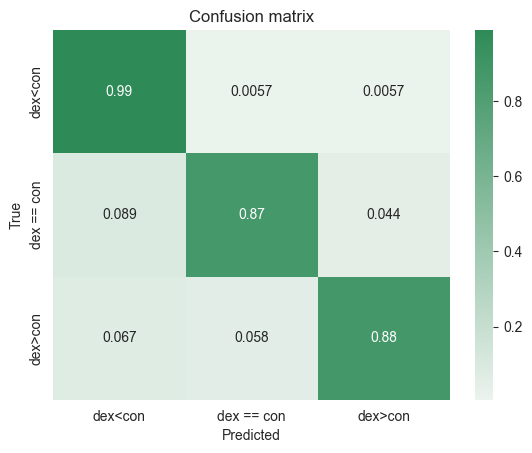

In [49]:
predictions = clf.predict(X)
print("\nOverall accuracy score: ", accuracy_score(y, predictions))

labels = ["dex<con", "dex == con", "dex>con"]
cm = confusion_matrix(y, predictions, normalize = "true")

fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm, ax = ax, cmap = sns.light_palette("seagreen", as_cmap=True), annot= True)
plt.title('Confusion matrix')

ax.set_xticklabels(labels);ax.set_yticklabels(labels)
plt.xlabel('Predicted');plt.ylabel('True')
plt.show()

<div class="alert alert-block alert-info">
<font size="2"><b>Pro tip:</b> Confusion matrices are a way to visualise the performance of a predicting algorithm. It's read it like this:<br>(We have normalised our data but here are the numbers)</font>
    
| |d&lt;c|d=c|d&gt;c|
|:-:|:-:|:-:|:-:|
|d&lt;c|173|1|1|
|d=c|4|39|2|
|d&gt;c|7|6|91|
    
<font size="2">From left to right vertically is spread what the model has predicted. For example the model has predicted 173+4+7 = 184 results as being dex&lt;con. Separated vertically we can see of those 184, how many were rightly predicted (173), and how many were predicted as other things than the right thing (4 as d=c and 7 as d>c).
    We can transform the results in a percentage but careful! The percentage are of the total true values, i.e. horizontally added. For example, of the 4+39+2 true d=c values, only 39 have been predicted correctly. The accuracy of the model for each value, correct or no, is then established.</font>
</div> 
    


Ok, the model is finished. We have taken several visual characteristics of the monsters (if it can fly, what kind of monster it is, etc.) and through the unknown magic of "algorithms" we have transformed it into a model that can predict if a monster's dexterity save is lower than its constitution save. Hurray!<br>
Now, of course we're going to have a high accuracy since we're using all of the data to predict... well, all of the data. There are some errors that we will see are logical, but overall we could say this accuracy is very high, and that it is way better than with our rule of thumb specially in lower brackets.



But, wait, this is just a number, and a model we can't even see! What's the usefulness of this Decision Tree Classifier Algorithm? Fancy numbers to just say "yeah this model works I'm the best"? How do you even use it?

Well, one of the magics of a decision tree is that, because it behave like a decision tree (duh), we can actually plot it to have a map of decisions.<br>
This means we can literally plot a protocol to know if a creature has a higher dex save or con save!

### 3.3 Protocol map for dex and con saves <a id="protocol-map"></a>  [<font size="1">▲</font>](#Content-table)

In [50]:
feature_names = X.columns.values
m_types = np.array([x for x in all_m_types], dtype=object)
nb_to_size = { 1: 'Tiny', 2: 'Small', 3: 'Medium', 4: 'Large', 5: 'Huge', 6: 'Gargantuan'}

fig, ax = plt.subplots(figsize=(128,80), dpi=100)
_ = tree.plot_tree(clf, 
                   feature_names=list(feature_names),  
                   class_names=['dex << con','dex == con', 'dex >> con'],
                   filled=True, impurity = True, proportion = True
                   )

#lets modify certain aspects to make it more readable
def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        _lines = txt.splitlines()
        result = []
        condition_flag = False
        for i, line in enumerate(_lines):
            f = line.split(" ")[0]
            #condition
            if f in list(feature_names)+["swarm"]:
                condition_flag = True
                #type of monster
                if f in list(m_types)+["swarm"]:
                    if f == "swarm":
                        result.append(f"is not swarm of tiny beasts")
                    else:
                        result.append(f"is not {f}")
                #swim, fly, climb binario
                elif f in ['swim', 'fly', 'climb']:
                    result.append(f"does not {f}")
                #size -> to ext
                elif f == "size":
                    size_nb = float(line.split(" ")[-1])
                    result.append(f"is {nb_to_size[math.floor(size_nb)]} or smaller")
                #speed simple value
                elif f == "speed":
                    result.append(line)           
                #numeric_cr
                elif f == "numeric_cr":
                    result.append(line.replace("numeric_cr", "Cr"))  
            #gini
            elif f == "gini":
                if not condition_flag:
                    n = (1 - round(float(line.split(" ")[-1]), 2))*100
                    l = f"probability of {n}%"
                    result.append(l)  
            #samples
            elif f == "samples":
                pass
            #values
            elif f == "value":
                pass
            #result
            else:
                if not condition_flag:
                    result.append(line.replace("class = ", "")) 
                else:
                    result.append("<- True | False ->") 
        
        obj.set_text("\n".join(result))
    return obj


ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
plt.show()

Well there we go. Hell of a map.

This is the decision tree that can help us know if a monster's dex save is better than their con save. Every node corresponds to a decision point through where we can navigate until we find the answer of our question for that monster. Starting at the begining we just have to follow the nodes and the result will uncover itself.

__With this we can predict with 100% accuracy <font size="1">(0.93% of the time)</font> what kind of cantrip to use in any situation!__

Now in a serious note, the model is very well fitted over our data, which gives an obvious high score for accuracy, but it's not perfect.<br>
The reason is some values are simply impossible to know for the model.<br>
If we would take some of the elementals we can see why our model has a difficulty for some groups of monsters. (You can follow this example on the map)

In [51]:
int_cols = ['name', 'size', 'monster_type', 'speed', 'swim', 'fly', 'climb', 'dex_save_f', 'con_save_f', 'dex_higher_than_con']
dftr[(dftr.numeric_cr <= 1.5) &\
     (dftr.monstrosity == 0) &\
     (dftr["size"] <= 2) &\
     (dftr.plant == 0) &\
    (dftr.gnome == 0) &\
     (dftr.elemental == 1) &\
     (dftr.numeric_cr > 0.375) &\
     (dftr.fly == 1) ]\
    [int_cols]

,name,size,monster_type,speed,swim,fly,climb,dex_save_f,con_save_f,dex_higher_than_con
92,Dust Mephit,2,Elemental,30,0,1,0,2,0,2
172,Ice Mephit,2,Elemental,30,0,1,0,1,0,2
189,Magma Mephit,2,Elemental,30,0,1,0,1,1,1


As we see for the same characteristic there's a bunch of monsters with different results. Our model is limited by the scarceness of data differenciating between these different monsters.

### Conclusion <a id="conclusion"></a> [<font size="1">▲</font>](#Content-table)

We have seen that after cr 4 it is much more prevalent for dex saves to be lower than con saves for a big majority of monsters. The rule of thumb is quite accurate in that bracket, so __Sword burst__ seems to have an advantage.
Its useful damage type has no resistances or immunities across the board, and, more importantly, it's probably the coolest of the three.

For lower cr the conclusion is still undecided. More studies could be made towards that bracket, specially considering the amount of monsters there are, but it seems the small tendencies we have observed aren't enough to really sustain any methodology to find the better save.

In any case, if we want a more precise prediction we have developped a decision tree that can help us know what save to use, with 93% accuracy, in any cr level. Maybe in a future more data could be integrated to make it more flexible while maintining accuracy, or maybe a system to find what kind of save to use faster than following this big map, but for precision info on dex vs con save our map can help us decide what to use.

Maybe you could try it yourself to see the results!

<div class="alert alert-block alert-warning">
<font size="5">Sword Burst</font>
       
<div id="page-content">

<div class="content-separator" style="display: none:"></div>



<p>Source: Tasha's Cauldron of Everything</p>
<p><em>Conjuration cantrip</em></p>
<p><strong>Casting Time:</strong> 1 action<br>
<strong>Range:</strong> Self (5-foot radius)<br>
<strong>Components:</strong> V<br>
<strong>Duration:</strong> Instantaneous</p>
<p>You create a momentary circle of spectral blades that sweep around you. All other creatures within 5 feet of you must succeed on a Dexterity saving throw or take 1d6 force damage.</p>
<p><strong><em>At Higher Levels.</em></strong> This spell's damage increases by 1d6 when you reach 5th level (2d6), 11th level (3d6), and 17th level (4d6).</p>
<p><strong><em>Spell Lists.</em></strong> Artificer, Sorcerer (Optional), Warlock (Optional), Wizard (Optional)</p>
<div class="content-separator" style="display: none:"></div>

</div>